In [102]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [103]:
dataset = pd.read_csv("diabetes.csv")
# dataset = pd.read_csv("Healthcare-Diabetes.csv")

In [104]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
dataset.shape

(768, 9)

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [107]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [108]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='count'>

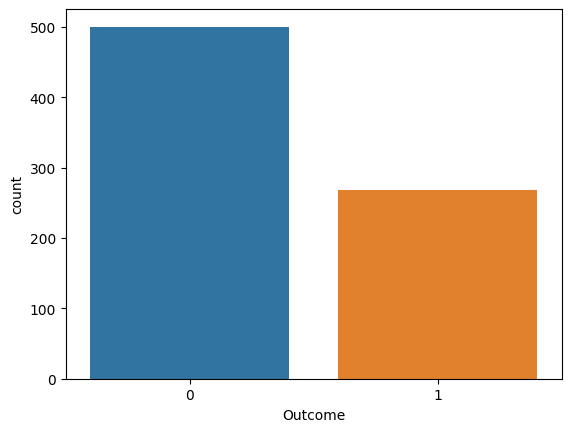

In [109]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

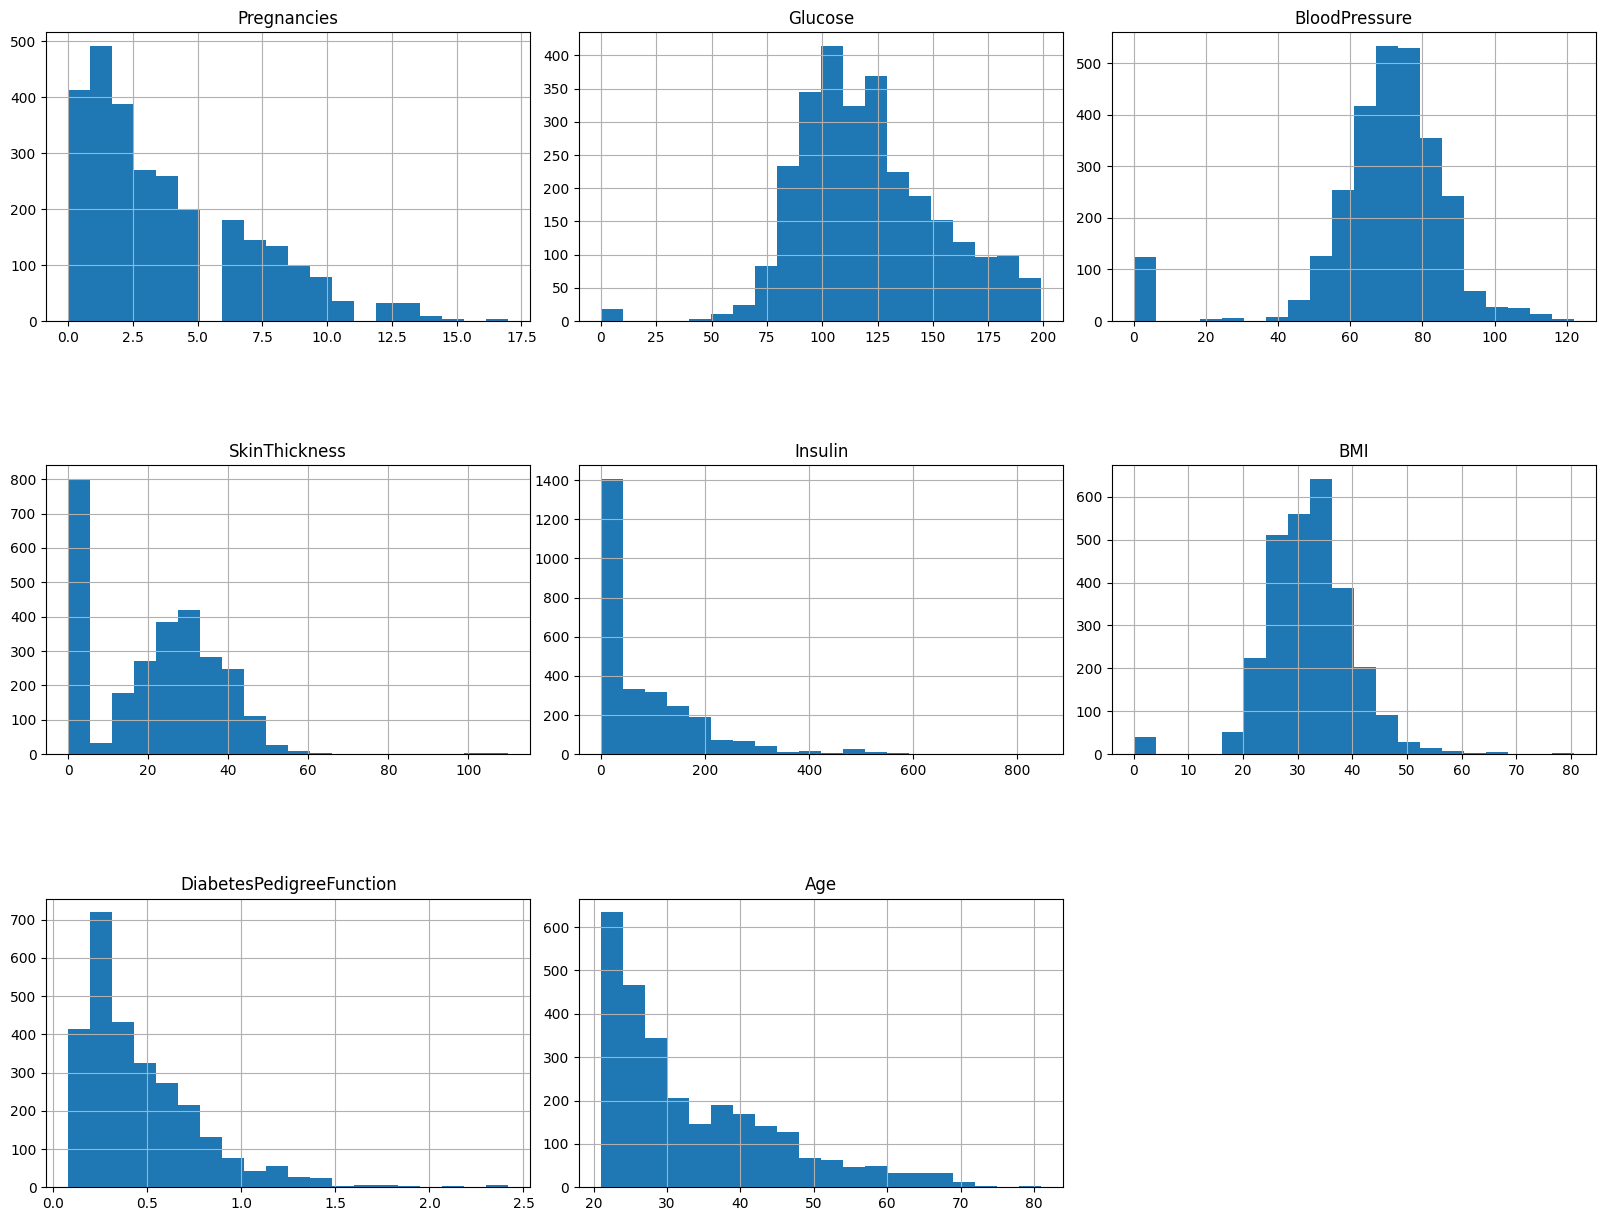

In [110]:
import itertools
import math
import matplotlib.pyplot as plt

col = dataset.columns[:8]
plt.subplots(figsize=(20, 15))
length = len(col)
num_rows = math.ceil(length / 3)  

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(num_rows, 3, j + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    df[i].hist(bins=20)
    plt.title(i)

plt.show()

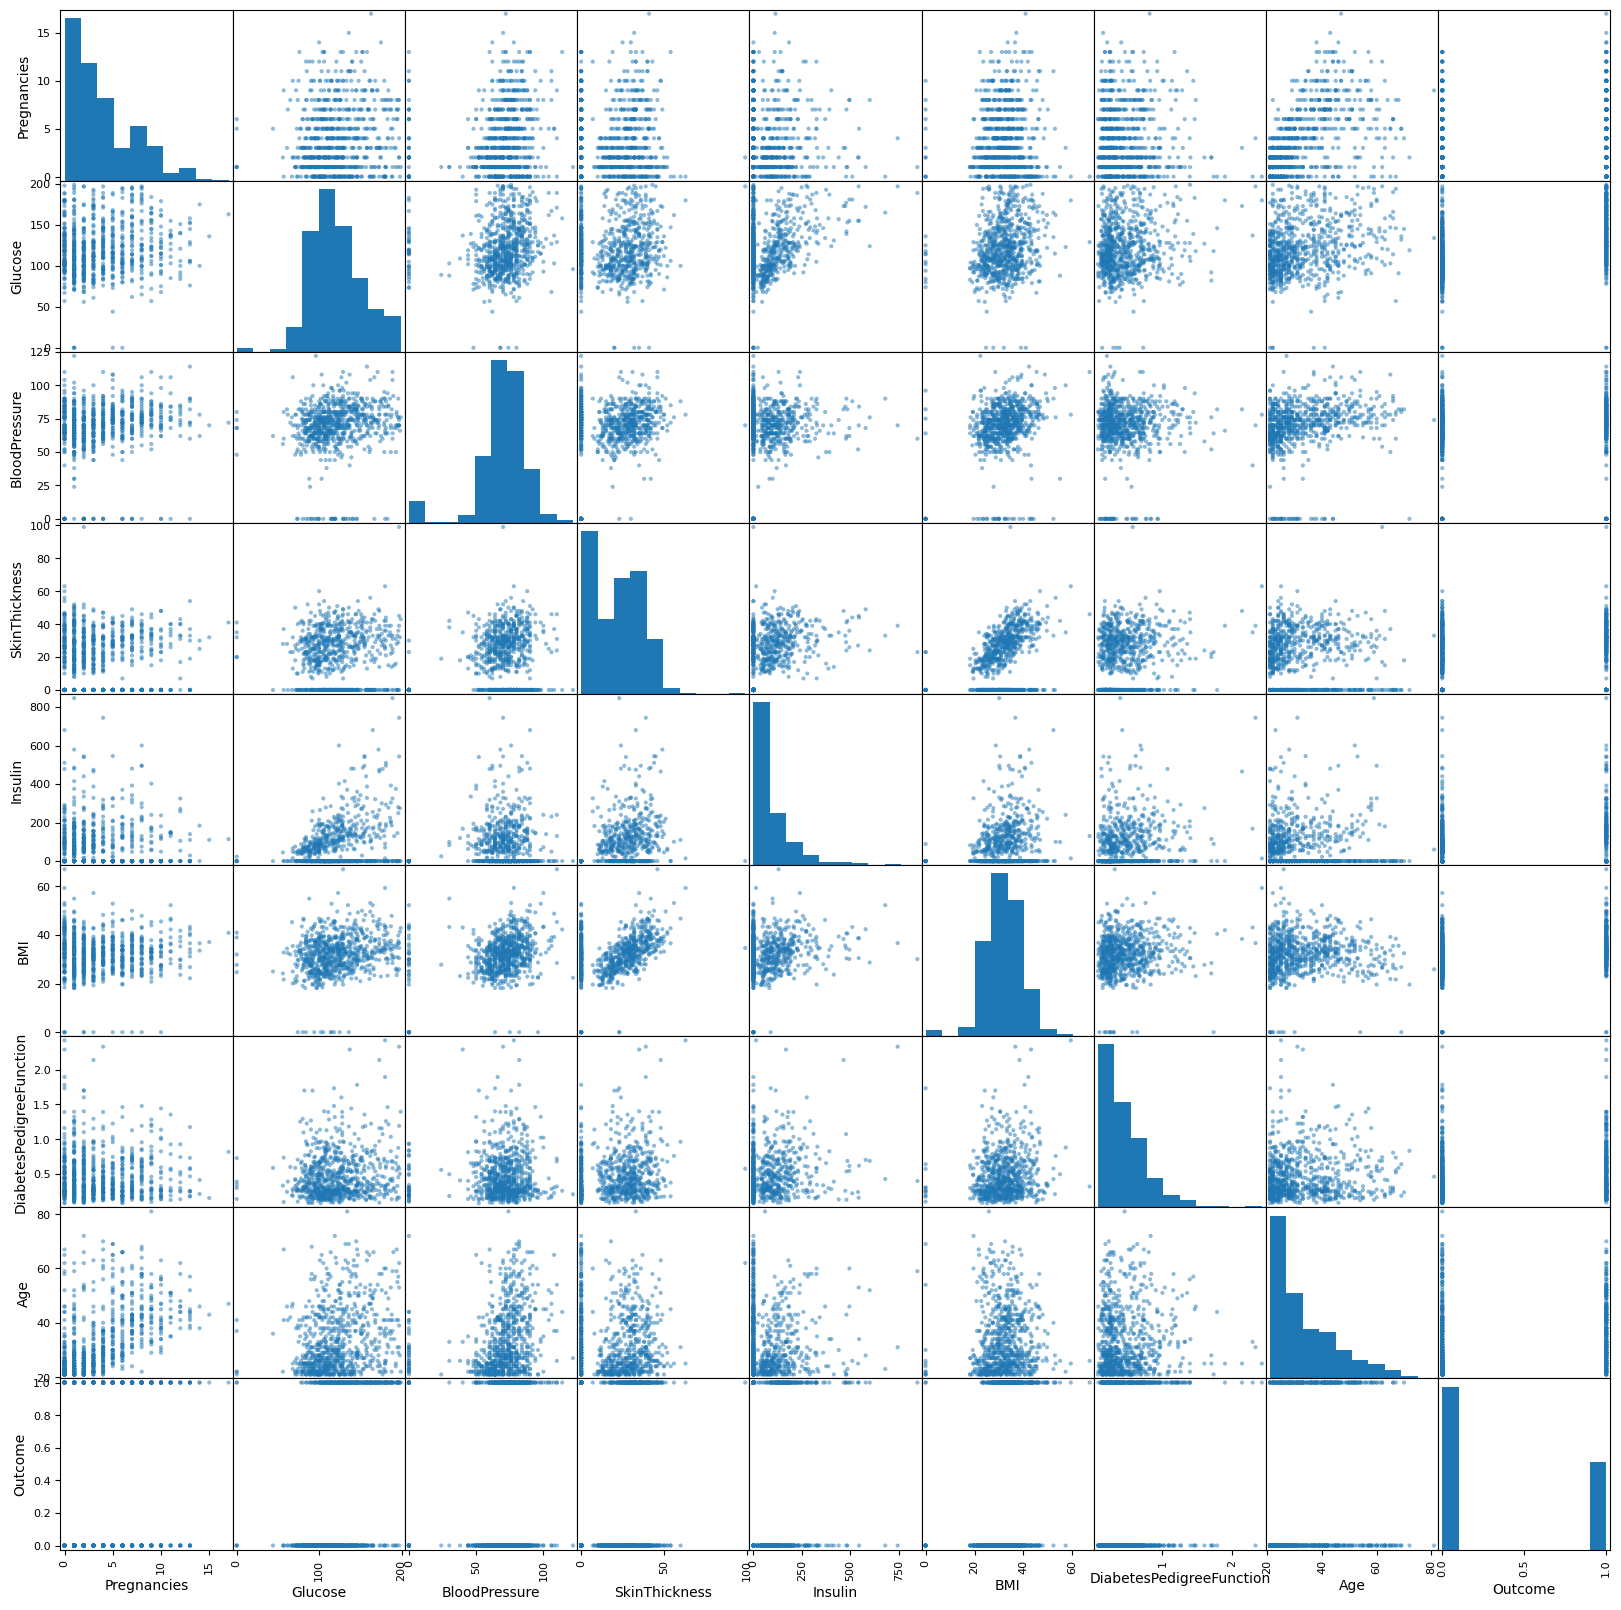

In [111]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(dataset, figsize=(20, 20))
plt.show()

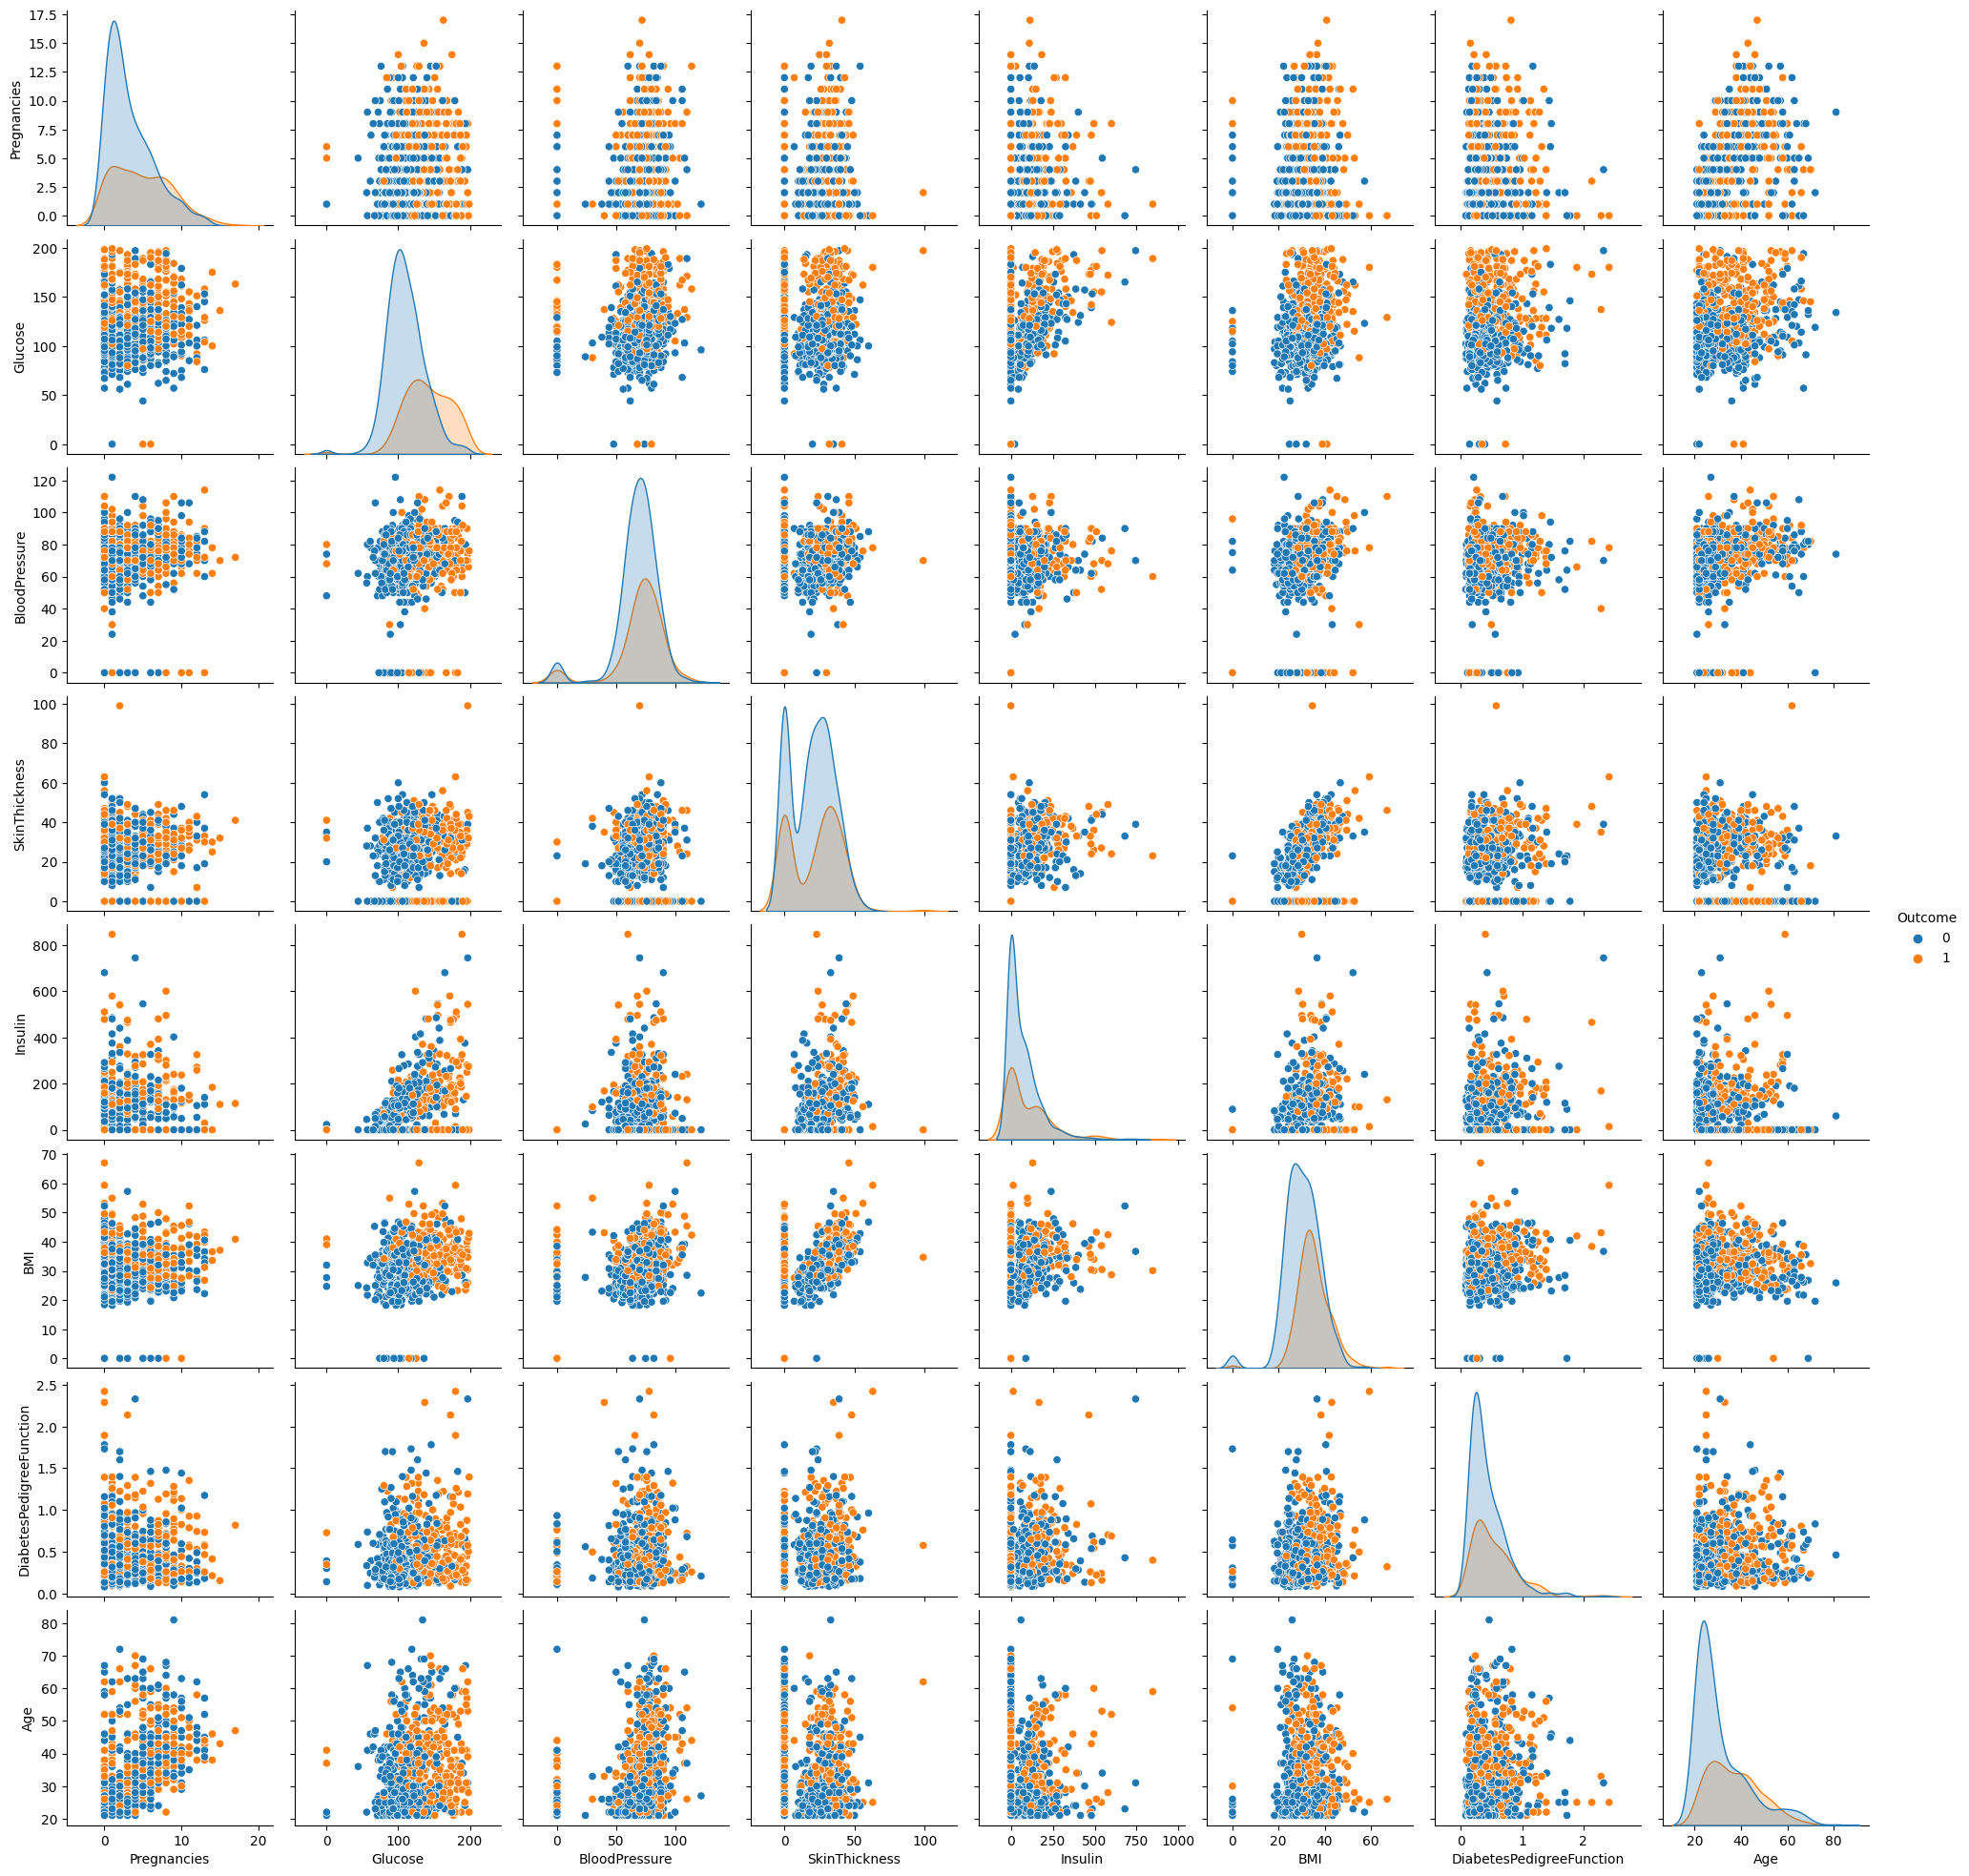

In [112]:
sns.pairplot(data = dataset, hue = 'Outcome')

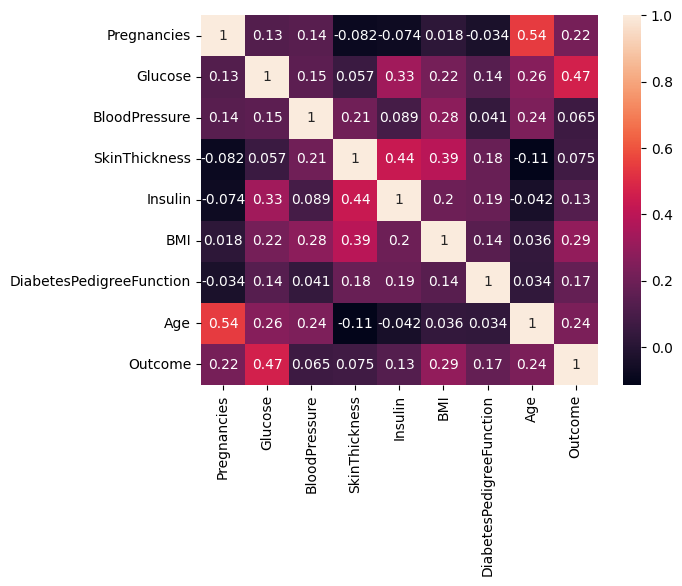

In [113]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

##Step 3: Data Preprocessing

In [114]:
datset_new = dataset

In [115]:
datset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = datset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [116]:
datset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [117]:
# Replacing NaN with mean values
datset_new["Glucose"].fillna(datset_new["Glucose"].mean(), inplace = True)
datset_new["BloodPressure"].fillna(datset_new["BloodPressure"].mean(), inplace = True)
datset_new["SkinThickness"].fillna(datset_new["SkinThickness"].mean(), inplace = True)
datset_new["Insulin"].fillna(datset_new["Insulin"].mean(), inplace = True)
datset_new["BMI"].fillna(datset_new["BMI"].mean(), inplace = True)

shifts central tendency to mean.
can introduce bias.


In [118]:
datset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [119]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

# Fit and transform your data
df_scaled = sc.fit_transform(datset_new)


X_scaled = (X - X_min) / (X_max - X_min)


In [120]:
df_scaled = pd.DataFrame(df_scaled)

In [121]:
# Assuming df_scaled is a NumPy array
X = df_scaled.iloc[:, [1, 4, 5, 7]].values
Y = df_scaled.iloc[:, 8].values

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = datset_new['Outcome'] )

In [123]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


In [124]:
datset_new['Outcome'].dtype

dtype('int64')

##Step 4: Data Modelling

In [125]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

Logistic Regression:

Type: Linear classification algorithm.
Use: Well-suited for binary classification problems.
Key Feature: Estimates the probability of an instance belonging to a particular class.
Strengths: Simple, interpretable, and often used as a baseline model.
Weaknesses: Assumes a linear relationship between features and the log-odds of the target.

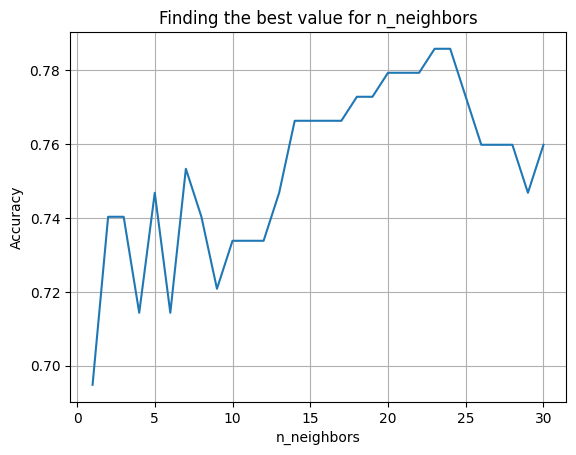

In [126]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = []  # Use a Python list to store accuracy scores

for i in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, prediction)
    acc.append(accuracy)

import matplotlib.pyplot as plt

plt.plot(X_axis, acc)
plt.title("Finding the best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


a simple hyperparameter tuning exercise, and the plot helps us visualize how the accuracy changes with different values of "n_neighbors".  we plan to chose 3 n_neighbors instead of 1 as it would be a good choice to balance betweent the senistivity and accuracy

In [127]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

K-Nearest Neighbors (KNN):

Type: Instance-based, non-parametric classification algorithm.

Use: Can be used for both binary and multiclass classification problems.

Key Feature: Classifies instances based on the majority class among their k-nearest neighbors.

Strengths: Intuitive, no assumptions about the underlying data distribution.
Weaknesses: Sensitive to the choice of hyperparameters, can be computationally expensive with large datasets.

In [128]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

Support Vector Classifier (SVC):

Type: Linear classification algorithm.

Use: Effective for binary classification problems and can be extended to multiclass cases.

Key Feature: Finds the hyperplane that maximizes the margin between classes.

Strengths: Effective in high-dimensional spaces, works well with small to medium-sized datasets.

Weaknesses: Sensitivity to the choice of the kernel function, can be computationally expensive.

In [129]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

Naive Bayes:

Type: Probabilistic classification algorithm.

Use: Often used for text classification and spam detection.

Key Feature: Applies Bayes' theorem with the "naive" assumption of feature independence.

Strengths: Simple, fast, works well with high-dimensional data.

Weaknesses: Assumes feature independence (naive assumption) which may not hold in all cases.

In [130]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Decision Tree:

Type: Tree-based classification algorithm.

Use: Suitable for both binary and multiclass classification problems.

Key Feature: Represents decisions as a tree structure with nodes and branches.

Strengths: Can capture complex decision boundaries, interpretable, and handles
feature interactions.

Weaknesses: Prone to overfitting, may create deep trees with small datasets.

In [131]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

Random Forest:

Type: Ensemble learning method using decision trees.

Use: Effective for binary and multiclass classification and regression problems.

Key Feature: Combines multiple decision trees to make predictions and reduce
overfitting.

Strengths: Improved generalization, robust to overfitting, handles
high-dimensional data.

Weaknesses: Less interpretable than individual decision trees.

In [132]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

##Model Evaluation

In [133]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [134]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 74.02597402597402
Support Vector Classifier: 73.37662337662337
Naive Bayes: 71.42857142857143
Decision tree: 68.18181818181817
Random Forest: 75.97402597402598


In [135]:
from sklearn.metrics import f1_score

# Calculate F1-scores for all models
f1score_logreg = f1_score(Y_test, Y_pred_logreg)
f1score_knn = f1_score(Y_test, Y_pred_knn)
f1score_svc = f1_score(Y_test, Y_pred_svc)
f1score_nb = f1_score(Y_test, Y_pred_nb)
f1score_dectree = f1_score(Y_test, Y_pred_dectree)
f1score_ranfor = f1_score(Y_test, Y_pred_ranfor)

# Print F1-scores
print("F1-score Logistic Regression:", f1score_logreg)
print("F1-score K-Nearest Neighbors:", f1score_knn)
print("F1-score Support Vector Classifier:", f1score_svc)
print("F1-score Naive Bayes:", f1score_nb)
print("F1-score Decision Tree:", f1score_dectree)
print("F1-score Random Forest:", f1score_ranfor)


F1-score Logistic Regression: 0.5567010309278351
F1-score K-Nearest Neighbors: 0.6153846153846153
F1-score Support Vector Classifier: 0.577319587628866
F1-score Naive Bayes: 0.5686274509803922
F1-score Decision Tree: 0.5242718446601942
F1-score Random Forest: 0.6407766990291262


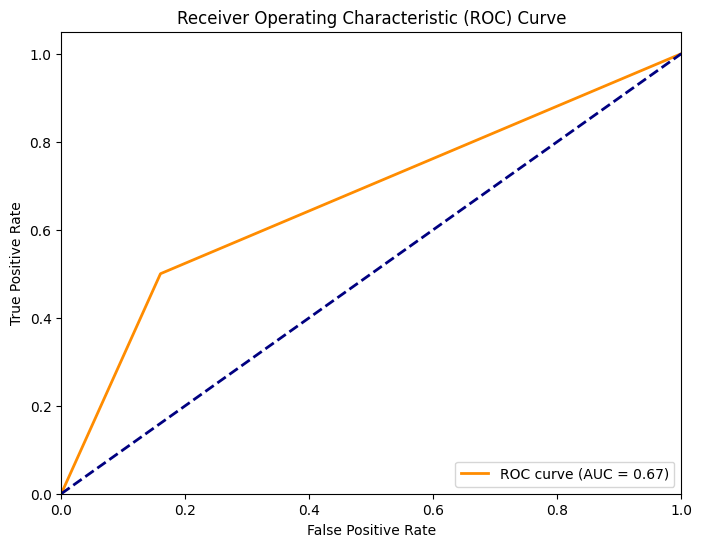

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#  ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_logreg)

#  AUC-ROC score. area under curve
roc_auc = roc_auc_score(Y_test, Y_pred_logreg)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


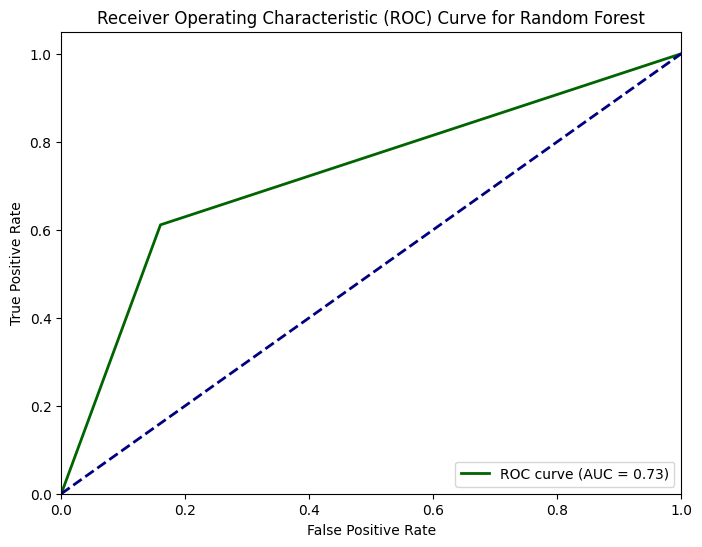

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC-ROC for Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_pred_ranfor)
roc_auc_rf = roc_auc_score(Y_test, Y_pred_ranfor)

# Plotting ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


In [138]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)
cm

array([[84, 16],
       [21, 33]], dtype=int64)

<AxesSubplot: >

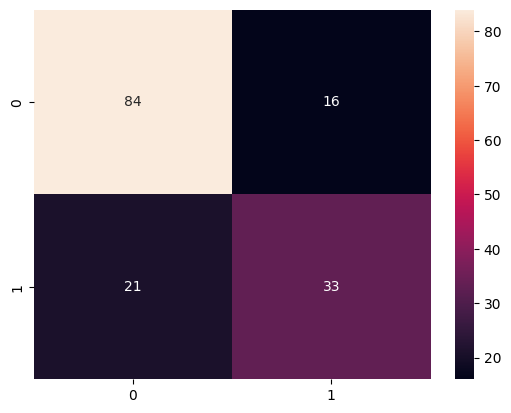

In [139]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [140]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ranfor))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       100
         1.0       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [153]:
from sklearn.metrics import log_loss

logloss_logreg = log_loss(Y_test, Y_pred_logreg)
logloss_knn = log_loss(Y_test, Y_pred_knn)
logloss_svc = log_loss(Y_test, Y_pred_svc)
logloss_nb = log_loss(Y_test, Y_pred_nb)
logloss_dectree = log_loss(Y_test, Y_pred_dectree)
logloss_ranfor = log_loss(Y_test, Y_pred_ranfor)


In [154]:
print(f"Log Loss for Logistic Regression: {logloss_logreg}")
print(f"Log Loss for K-Nearest Neighbors: {logloss_knn}")
print(f"Log Loss for Support Vector Classifier: {logloss_svc}")
print(f"Log Loss for Naive Bayes: {logloss_nb}")
print(f"Log Loss for Decision Tree: {logloss_dectree}")
print(f"Log Loss for Random Forest: {logloss_ranfor}")


Log Loss for Logistic Regression: 10.06413698527297
Log Loss for K-Nearest Neighbors: 9.361987893277181
Log Loss for Support Vector Classifier: 9.59603759060911
Log Loss for Naive Bayes: 10.298186682604902
Log Loss for Decision Tree: 11.46843516926455
Log Loss for Random Forest: 8.659838801281394


In [141]:
# import pickle

# # Save the trained random_forest model to a file
# with open('model.pkl', 'wb') as file:
#     pickle.dump(knn, file)



In [143]:
import pickle

# Save the trained random_forest model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(ranfor, file)


In [144]:
import pickle


with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [149]:

with open('input_data.txt', 'r') as file:
    input_data = [list(map(float, line.strip().split(','))) for line in file]


In [150]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
input_data_scaled = sc.fit_transform(input_data)


X_input = input_data_scaled


In [151]:
Y_input = loaded_model.predict(X_input)


In [152]:
for prediction in Y_input:
    print(prediction)


0.0
1.0
